# Laboration 1 Medical Prediction

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
cardio_data = pd.read_csv("../Laboration_1_Medical_Prediction/Data/cardio_train.csv", delimiter=";")
cardio_data.drop("id", axis=1, inplace=True)
cardio_data


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
cardio_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
cardio_count = cardio_data["cardio"].value_counts()
cardio_count = pd.DataFrame({"Positive" : cardio_count[1] , "Negative": cardio_count[0]}, index=[0])
print(f"Postive and negativ for heart and cardiovascular diseases\n {cardio_count.to_string(index=False)}")


Postive and negativ for heart and cardiovascular diseases
  Positive  Negative
    34979     35021


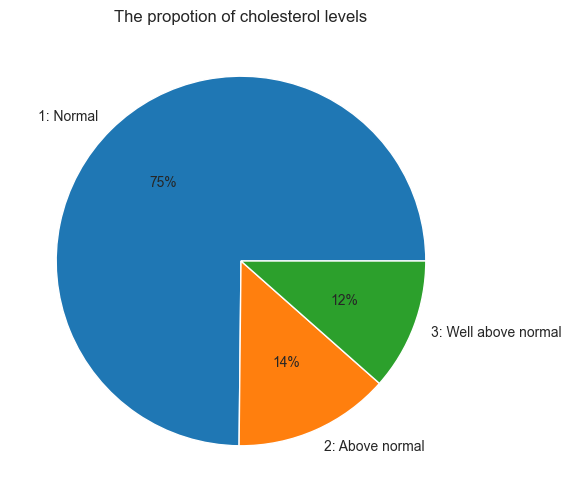

In [11]:
chol_count = cardio_data["cholesterol"].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(chol_count, labels=["1: Normal", "2: Above normal", "3: Well above normal"], autopct="%.0f%%")
plt.title("The propotion of cholesterol levels")
plt.show()


<Axes: xlabel='age', ylabel='Count'>

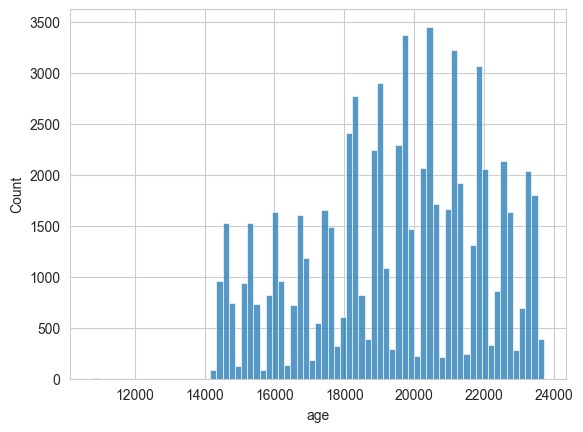

In [12]:
sns.histplot(cardio_data["age"])

Text(0.5, 1.0, 'Number of smokers and non- smokers')

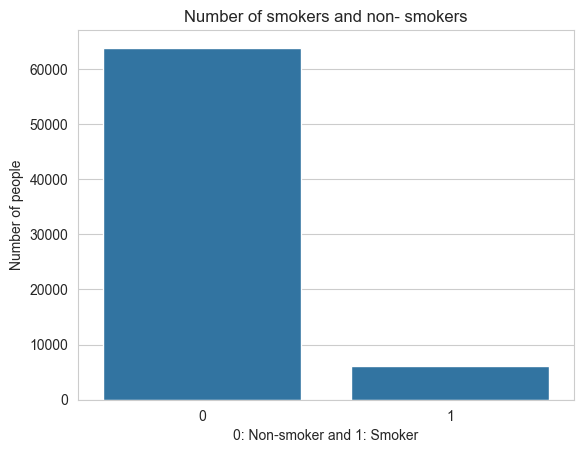

In [21]:
sns.countplot(data=cardio_data, x="smoke")
plt.xlabel("0: Non-smoker and 1: Smoker")
plt.ylabel("Number of people")
plt.title("Number of smokers and non- smokers")

Text(0.5, 1.0, 'Weight of people')

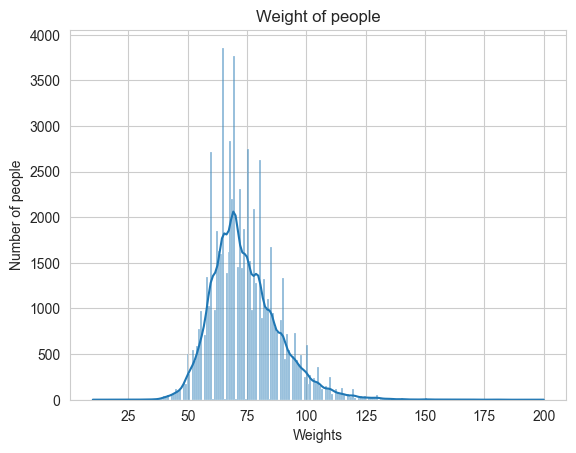

In [27]:
sns.histplot(cardio_data["weight"], kde=True)
plt.xlabel("Weights")
plt.ylabel("Number of people")
plt.title("Weight of people")

Text(0.5, 1.0, 'Height of people')

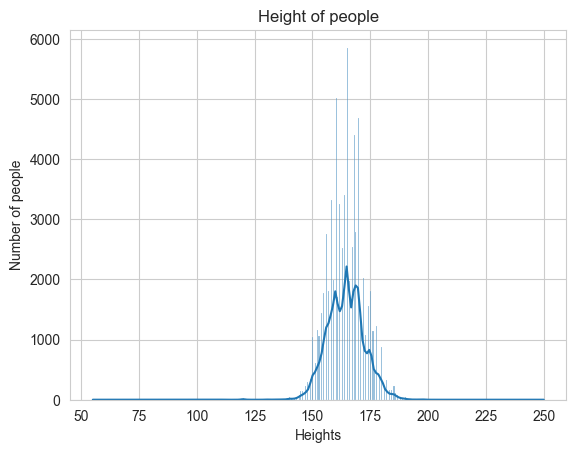

In [29]:
sns.histplot(cardio_data["height"], kde=True)
plt.xlabel("Heights")
plt.ylabel("Number of people")
plt.title("Height of people")

Text(0.5, 1.0, 'Smokers split into genders')

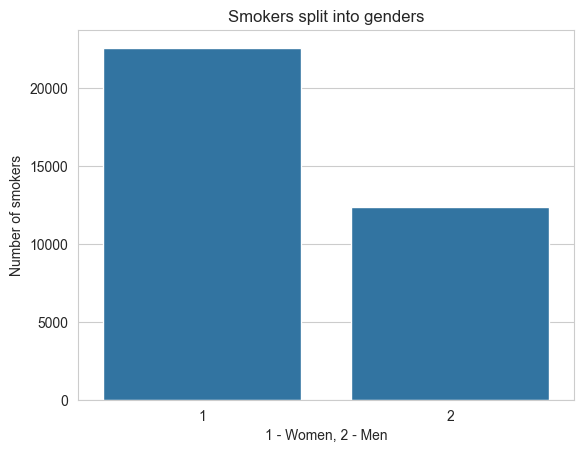

In [40]:
cardio_sex_1 = cardio_data[cardio_data["cardio"] == 1]
sns.countplot(cardio_sex_1, x="gender")
plt.xlabel("1 - Women, 2 - Men")
plt.ylabel("Number of smokers")
plt.title("Smokers split into genders")

### Formula for BMI

$BMI = \frac{weight_kg}{height_{m^2}}$

In [ ]:
def bmi(weight, height):
   
   bmi = weight/(height/100)**2

   return bmi

cardio_data["BMI"] = bmi(cardio_data["weight"], cardio_data["height"]) 

cardio_data["BMI"].describe(percentiles=[.05, .1, .15, .25, .5, .75, .95])

# Tänk på std och hur sprdingen är kring medlet. också att 95% täcks av värdet 37.3 och 5% täcks av värdet 20.9 

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
5%          20.936639
10%         22.074100
15%         22.857143
25%         23.875115
50%         26.374068
75%         30.222222
95%         37.385703
max        298.666667
Name: BMI, dtype: float64

<Axes: ylabel='BMI'>

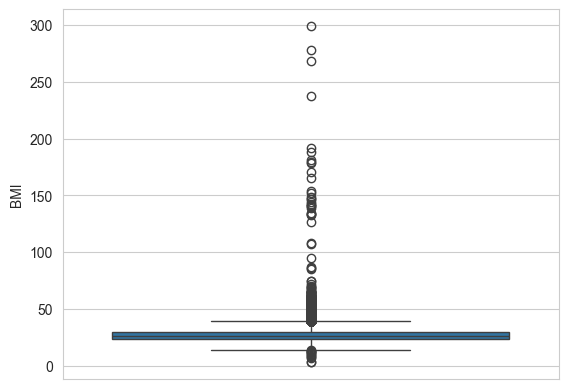

In [67]:
sns.boxplot(cardio_data["BMI"])